<a href="https://colab.research.google.com/github/stswee/IntroCompStatsHSSP2023/blob/main/Mini_Projects_Solutions/Intro_to_Comp_Statistics_Mini_Project_4_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computational Statistics (HSSP 2023 Edition)
## Mini-Project 4: Bootstrapping and Kaggle Datasets

In this mini-project, you will run a bootstrapping program. You will also learn how to load in a dataset directly from Kaggle and perform basic data manipulation.

### Bootstrapping

In class, we covered how bootstrapping works and why it is a useful tool. It turns out that there are multiple flavors of bootstrapping: parametric, semiparametric, and nonparametric.

#### Exercise 1
Perform a little bit of reading on parametric, semiparametric, and nonparametric bootstrapping. In your own words, describe the differences between the three flavors of bootstrapping.

Sample Response:

Parametric bootstrapping assumes that the data comes from some underlying distribution (ex: the normal distribution). We can estimate the parameters of this distribution and use these parameters to simulate the sample.

Nonparametric bootstrapping involves sampling with replacement from the dataset many times. The idea is that the if the original data comes from some weird distribution (one that we may not be able to figure out), if we sample and resample from our original data, then we are (almost) sampling from the weird distribution.

Semiparametric bootstrapping lies somewhere in between the two approaches. Like parametric bootstrapping, we assume that the data comes from some underlying distribution and estimate the parameters of that distribution. Next, we fit the data and calculate the errors. We then follow the nonparametric approach in which we sample with replacement the errors. The errors are then applied to each data point. In essence, we are shifting our output a little higher or a little lower, simulating noise. We then estimate the parameters and refit the model.

#### Exercise 2

Suppose we run an experiment to see if a casino is playing fair. For this experiment, we determine that a casino is "fair" if the mean profit is around 100 (in thousands). We gather profit data from the casino on 40 different days.

In [2]:
# Import packages
import numpy as np
from scipy import stats

In [3]:
# Data
profit = np.array([100, 115, 170, 105, 108, 98, 142, 110, 150, 124,
                   131, 113, 88, 108, 106, 114, 131, 99, 102, 154,
                   121, 130, 112, 110, 100, 120, 130, 121, 114, 111,
                   202, 145, 162, 82, 123, 182, 102, 101, 108, 96])
profit.size # Should be 40

40

We would like to generate confidence intervals for the data. As a general rule of thumb, if the confidence interval contains the "fair" value of 100, then we can say that it is plausible that the casino is playing fair.

In Statistics, the expression for the (aysmptotic) 95% confidence interval is:

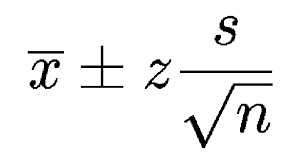

where xbar (x with a bar on top) is the sample mean, z is equal to 1.96, s is the sample standard deviation, and n is the sample size of 40.

For the more statistics-savvy people, at a "large enough" sample size, using either the z or t value will yield nearly the same result. Since our sample is "large enough," we'll opt to use a z value of 1.96.

Write the code to compute the (asymptotic) 95% confidence interval

In [5]:
# Write code here
mean = np.mean(profit) # Calculate mean
s = np.std(profit) # Calculate standard deviation
n = len(profit) # Calculate sample size

# Calculate confidence interval
stats.norm.interval(0.95, loc=mean, scale=s/np.sqrt(n))


(113.16811046302149, 128.8318895369785)

Write code to compute the bootstrap 95% confidence interval. Compare your result with the asymptotic 95% confidence interval.

In [10]:
# Write code here

# Single sample
sample = np.random.choice(profit, size = len(profit))
mean = np.mean(sample) # Calculate mean
s = np.std(sample) # Calculate standard deviation
n = len(sample) # Calculate sample size

# Calculate confidence interval
stats.norm.interval(0.95, loc=mean, scale=s/np.sqrt(n))


(107.52179877218893, 121.47820122781107)

In [13]:
# Bootstrap
# Number of iterations
B = 1000

# Store results
lower_bound = np.empty(B)
upper_bound = np.empty(B)

# Perform bootstrapping
for b in range(B):

  # Single sample
  sample = np.random.choice(profit, size = len(profit))
  mean = np.mean(sample) # Calculate mean
  s = np.std(sample) # Calculate standard deviation
  n = len(sample) # Calculate sample size

  # Append results
  lower_bound[b] = stats.norm.interval(0.95, loc=mean, scale=s/np.sqrt(n))[0]
  upper_bound[b] = stats.norm.interval(0.95, loc=mean, scale=s/np.sqrt(n))[1]

  # Keep track of progress for every 100 iterations
  if (b % 100 == 0):
    print(b)

0
100
200
300
400
500
600
700
800
900


In [15]:
# Get 95% confidence interval
print("Lower bound: " , np.mean(lower_bound)) # Use mean of lower bounds
print("Upper bound: " , np.mean(upper_bound)) # Use mean of upper bounds

Lower bound:  113.36176429594984
Upper bound:  128.59743570405018


Based on your intervals above, is the casino playing fair?

Both intervals do not contain 100, which means that the casino is likely to not be playing fair.